# K-Means clustering

K-means clustering is a simple yet elegant algorithm. It involves two steps:
1. Initialise cluster centroids, $\mu_j$ (random or based on the data)
2. Repeat until converged:
    - assign each datapoint to a cluster:
        - Set $c^{(i)}=$ argmin$_j||x^{(i)} - \mu_j||_2$
    - update the centroid of the cluster based on new assignments:
        - For j = 1, ..., k
            - $\mu_{ji} = \frac{\sum\limits_{i=1}^{m}\mathbb{1}(c_i=j)x^{i}}{\sum\limits_{i=1}^m\mathbb{1}(c^{i}=j)}$

$c^{(i)}$ is index of the cluster assigned to data point $x^{(i)}$, $\mathbb{1}$ is the indicator function and k is the number of centroids

## Create the dataset

In [703]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

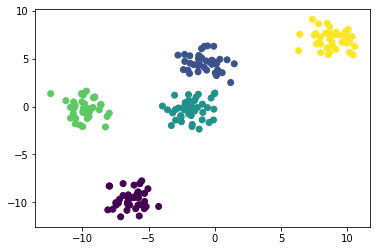

In [716]:
np.random.seed(11)
X, y = make_blobs(n_samples=[40]*5, n_features=2)
plt.scatter(X[:,0], X[:,1], c=y)

## from scratch

In [729]:
def l2_norm(X, mu):
    return (((X - mu)**2).sum(1))**0.5
#     print(X.shape, mu.shape)
#     return np.linalg.norm(X, mu)/

class KMeansNp():
    def __init__ (self, n_clusters=3, n_iters=300, tol=0.0001):
        self.k = n_clusters
        self.n_iters = n_iters
        self.tol = tol
        
    def initialise_centroids(self):
        mu_j = []
        for i in range(self.k):
            idx = np.random.choice(np.arange(len(X)), int(len(X)/4))
            mu_j.append(X[idx].mean(0))
        
        self.mu_j = np.array(mu_j)
    
    def train(self, X):
        # Step 1:
        self.initialise_centroids()
        mu_j_prev = np.zeros((self.k, X.shape[1]))
        # Step 2: repeat until converged
        for i in range(self.n_iters):
            # a.) assign each point to a cluster
            self.c = np.argmin([(l2_norm(X, self.mu_j[j])) for j in range(self.k)], 0)
            # b.) calculate new centroids
            self.mu_j = np.array([X[self.c == j].mean(0) for j in range(self.k)])
            # check for convergence
            if l2_norm(mu_j_prev, self.mu_j).sum() < self.tol:
                print(f'Coverged after {i+1} iterations.')
                break
            
            mu_j_prev = self.mu_j

    def predict(self, X):
        return np.argmin([(l2_norm(X, self.mu_j[j])) for j in range(self.k)], 0)

In [730]:
np.random.seed(1)
n_clusters = 5
kmeans = KMeansNp(n_clusters=n_clusters)
kmeans.train(X)

Coverged after 5 iterations.


## Sci-kit learn

In [731]:
km_sk = KMeans(n_clusters = n_clusters).fit(X)

## Comparison

In [732]:
dist = l2_norm(np.sort(kmeans.mu_j.T), np.sort(km_sk.cluster_centers_.T)).sum()
print(f'L2 norm between centroids: {dist:.2e}')

L2 norm between centroids: 1.04e-14


In [733]:
x_line = np.linspace(X[:,0].min(), X[:,1].max(), 200)
y_line = np.linspace(X[:,1].min(), X[:,1].max(), 200)
grid = np.array([i.flatten() for i in np.meshgrid(x_line, y_line)]).T
labels = kmeans.predict(grid)
labels_sk = km_sk.predict(grid).reshape(200,200)

[Text(0.5, 1.0, 'Sci-kit learn')]

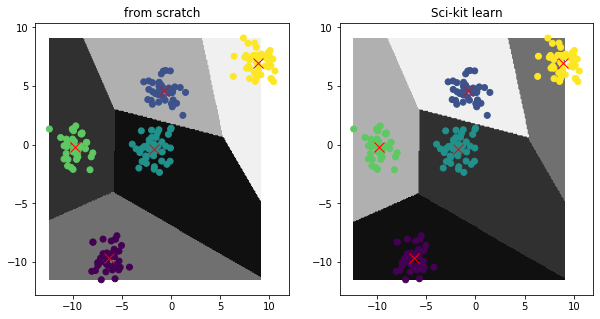

In [734]:
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contourf(x_line, y_line, labels.reshape(200,200), cmap='gray')
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].plot(kmeans.mu_j[:,0], kmeans.mu_j[:,1], 'rx', markersize=10)
ax[0].set(title='from scratch')

ax[1].contourf(x_line, y_line, labels_sk, cmap='gray')
ax[1].scatter(X[:,0], X[:,1], c=y)
ax[1].plot(km_sk.cluster_centers_[:,0], km_sk.cluster_centers_[:,1], 'rx', markersize=10)
ax[1].set(title='Sci-kit learn')